In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
##Get a summary of the datasets to identify data types and missing values.
train_data.info()
print('_'* 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [6]:
##Check the number of missing values in each column.¶
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [8]:
##Examine the statistical summary of numerical features.
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [10]:
#Categorical Data Summary
#Explore the statistics of categorical features.¶
train_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [11]:
test_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


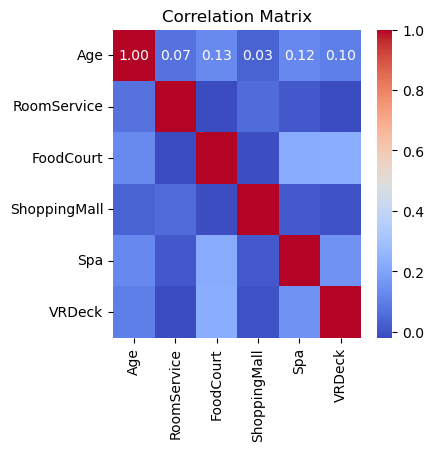

In [12]:
##Analyze the relationships between numerical features using a correlation matrix.
numeric_cols = train_data.select_dtypes(include=['number'])
# Correlation matrix for numeric columns
plt.figure(figsize=(4, 4))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [13]:
##Handling Missing Values
#Handle missing data by filling in missing values or dropping columns.
# Filling missing values in Age with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


# Dropping the Cabin column 
#train_data.drop('Cabin', axis=1, inplace=True)
#test_data.drop('Cabin', axis=1, inplace=True)

# Filling missing value in RoomService in the test and train dataset with the median
test_data['RoomService'].fillna(test_data['RoomService'].median(), inplace=True)
train_data['RoomService'].fillna(train_data['RoomService'].median(), inplace=True)

# Filling missing value in FoodCourt in the test and train dataset with the median
test_data['FoodCourt'].fillna(test_data['FoodCourt'].median(), inplace=True)
train_data['FoodCourt'].fillna(train_data['FoodCourt'].median(), inplace=True)

# Filling missing value in ShoppingMall in the test and train dataset with the median
test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].median(), inplace=True)
train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median(), inplace=True)

# Filling missing value in Spa in the test and train dataset with the median
test_data['Spa'].fillna(test_data['Spa'].median(), inplace=True)
train_data['Spa'].fillna(train_data['Spa'].median(), inplace=True)

# Filling missing value in VRDeck in the test and train dataset with the median
test_data['VRDeck'].fillna(test_data['VRDeck'].median(), inplace=True)
train_data['VRDeck'].fillna(train_data['VRDeck'].median(), inplace=True)

test_data['HomePlanet'].fillna('', inplace=True)
train_data['HomePlanet'].fillna('', inplace=True)

test_data['Destination'].fillna('', inplace=True)
train_data['Destination'].fillna('', inplace=True)

test_data['CryoSleep'].fillna('', inplace=True)
train_data['CryoSleep'].fillna('', inplace=True)
test_data['VIP'].fillna('', inplace=True)
train_data['VIP'].fillna('', inplace=True)

In [14]:
#Encoding Categorical Variables
#Convert categorical variables into numerical format.
# Converting CryoSleep into numerical values
train_data['CryoSleep'].replace([True, False,''], [1, 0,2], inplace=True)
test_data['CryoSleep'].replace([True, False,''], [1, 0,2], inplace=True)

# Converting HomePlanet into numerical values
train_data['VIP'].replace([True, False,''], [1, 0,2], inplace=True)
test_data['VIP'].replace([True, False,''], [1, 0,2], inplace=True)

# Converting VIP into numerical values
train_data['HomePlanet'].replace(['','Europa', 'Earth','Mars'], [0, 1,2,3], inplace=True)
test_data['HomePlanet'].replace(['','Europa', 'Earth','Mars'], [0, 1,2,3], inplace=True)

# Converting Destination into numerical values
train_data['Destination'].replace(['','55 Cancri e', 'PSO J318.5-22','TRAPPIST-1e'], [0, 1,2,3], inplace=True)
test_data['Destination'].replace(['','55 Cancri e', 'PSO J318.5-22','TRAPPIST-1e'], [0, 1,2,3], inplace=True)

# Converting Transported into numerical values
train_data['Transported'].replace([True, False], [1, 0], inplace=True)

In [15]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,3,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,2,0,F/0/S,3,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,A/0/S,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,A/0/S,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,2,0,F/1/S,3,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [16]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,2,1,G/3/S,3,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,2,0,F/4/S,3,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,1,1,C/0/S,1,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,1,0,C/1/S,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,2,0,F/5/S,3,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [17]:
# Dropping unnecessary columns
train_data.drop([ 'Name', 'Cabin'], axis=1, inplace=True)
test_data.drop([ 'Name', 'Cabin'], axis=1, inplace=True)

# Display the first few rows of the modified train and test datasets to verify the changes
train_data.head(),test_data.head()

(  PassengerId  HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
 0     0001_01           1          0            3  39.0    0          0.0   
 1     0002_01           2          0            3  24.0    0        109.0   
 2     0003_01           1          0            3  58.0    1         43.0   
 3     0003_02           1          0            3  33.0    0          0.0   
 4     0004_01           2          0            3  16.0    0        303.0   
 
    FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
 0        0.0           0.0     0.0     0.0            0  
 1        9.0          25.0   549.0    44.0            1  
 2     3576.0           0.0  6715.0    49.0            0  
 3     1283.0         371.0  3329.0   193.0            0  
 4       70.0         151.0   565.0     2.0            1  ,
   PassengerId  HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  \
 0     0013_01           2          1            3  27.0    0          0.0   
 1     0018_01     

In [18]:
# Splitting the dataset into features and target
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (6954, 11), Validation set: (1739, 11)


In [24]:
#Train and evaluate a Logistic Regression model.¶
# Initializing the model
log_reg = LogisticRegression(max_iter=90000)

# Training the model
log_reg.fit(X_train, y_train)

# Making predictions
y_pred_log_reg = log_reg.predict(X_val)

# Evaluating the model
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_val, y_pred_log_reg)
class_report_log_reg = classification_report(y_val, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("Classification Report:")
print(class_report_log_reg)

Logistic Regression Accuracy: 0.7671075330649799
Confusion Matrix:
[[552 309]
 [ 96 782]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       861
           1       0.72      0.89      0.79       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.76      1739
weighted avg       0.78      0.77      0.76      1739



In [25]:
#Random Forest
#Train and evaluate a Random Forest model.
# Initializing the model
rf_clf = RandomForestClassifier(n_estimators=3000, random_state=42)

# Training the model
rf_clf.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_clf.predict(X_val)

# Evaluating the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
class_report_rf = classification_report(y_val, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.772857964347326
Confusion Matrix:
[[672 189]
 [206 672]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       861
           1       0.78      0.77      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [21]:
# Making predictions on the test dataset
y_test_pred = rf_clf.predict(test_data)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': y_test_pred
})

In [23]:
# Save to CSV
submission['Transported'].replace([0,1], ['FALSE', 'TRUE'], inplace=True)
submission.to_csv('submission 2 SamuelMolina.csv', index=False)